<H1>Mercedes-Benz Greener Manufacturing¶

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('merctrain.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
#1. All columns are anonymised.
#2. 8 object type columns (possibly X0..X8) need to be transformed using labelbinarizer/encoder
#3. Need to drop ID and y columns, y because its the target variable, and ID because its must be unique for all the 4208 occurences.

<H1>Exploratory Data Analysis><
<H2>Checking distribution of labels><¶

In [10]:
y_train = df_train['y'].values
print(f'Minimum : {min(y_train)} Maximum : {max(y_train)} Mean : {y_train.mean()} Standard Deviation : {y_train.std()}')

Minimum : 72.11 Maximum : 265.32 Mean : 100.66931812782134 Standard Deviation : 12.6778749695168


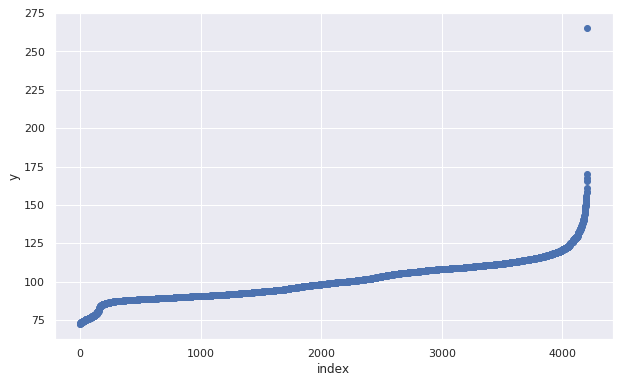

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [12]:
# List the columns of the DataFrame having 0 as the Variance

In [13]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [14]:
# Drop the columns having 0 as their Variance in the DataFrame

In [15]:
var = df_train.var()[df_train.var() == 0].index.values
print(var)

['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X347']


In [16]:
df_train1 = df_train.drop(['X11', 'X93' ,'X107' ,'X233', 'X235' ,'X268', 'X289' ,'X290' ,'X293' ,'X297','X330', 'X347'],axis=1)
df_train1.shape

(4209, 366)

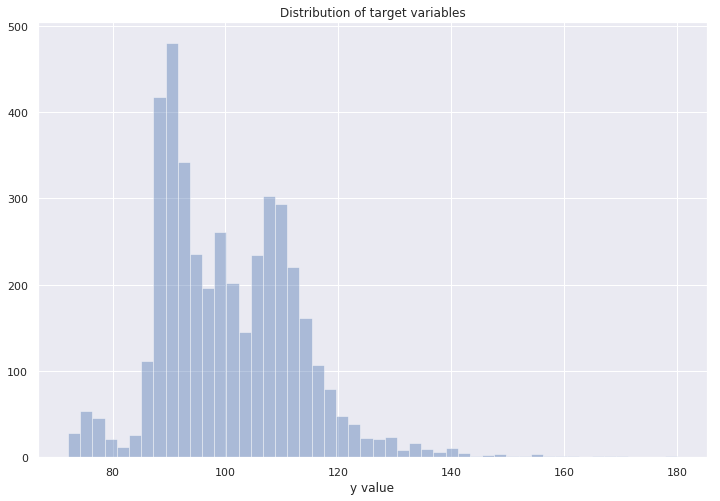

In [17]:
#Now let us plot the distribution graph.
ulimit = 180
df_train['y'].ix[df_train['y']>ulimit] = ulimit
plt.figure(figsize=(12,8))
sns.distplot(df_train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.title('Distribution of target variables')
plt.show()

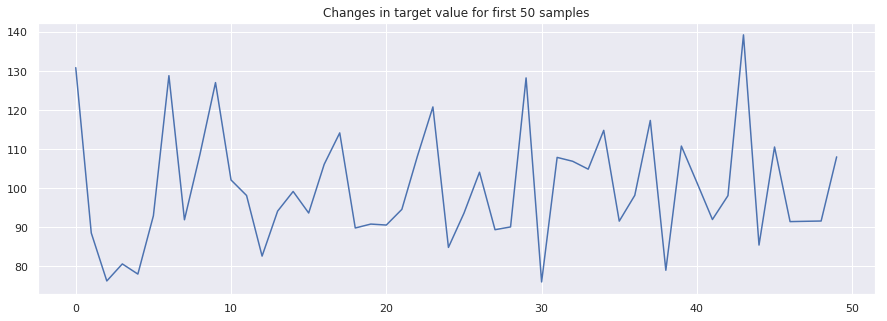

In [18]:
plt.figure(figsize=(15,5))
plt.plot(y_train[:50])
plt.title('Changes in target value for first 50 samples');

<H1>Label Encoder><

In [19]:
labels=df_train1.describe(include=['object']).columns.values
labels

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [20]:
lec = LabelEncoder()
for col in labels:
    lec.fit(df_train1[col].append(df_test[col]).values)
    df_train1[col]=lec.transform(df_train1[col])
    df_test[col]=lec.transform(df_test[col])
df_train1.iloc[:5,2:8]

,X0,X1,X2,X3,X4,X5
0,37,23,20,0,3,27
1,37,21,22,4,3,31
2,24,24,38,2,3,30
3,24,21,38,5,3,30
4,24,23,38,5,3,14


In [21]:
# Create Dependent and Independent Variables from the Dataset
x = df_train1.drop(['ID','y'],axis=1)
y = df_train1.y
print(x.shape)
print(y.shape)

(4209, 364)
(4209,)


<H1>Dimensionality Reduction><

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X=pca.fit_transform(x)
X.shape

(4209, 50)

In [23]:
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,24,21,38,5,3,30,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
display(X)

array([[-2.07635904e-01,  2.44432248e-02,  1.48645082e+01, ...,
        -3.43213091e-01, -5.18309850e-02, -1.72871850e-01],
       [-2.44087570e-01,  1.73167468e+00,  1.82110804e+01, ...,
         2.62334143e-01, -6.08885169e-02, -6.34695861e-02],
       [ 1.62731508e+01,  1.37845266e+01,  1.79269909e+01, ...,
        -1.52176040e-01, -8.28813196e-01, -2.20121266e-01],
       ...,
       [ 3.10773913e+01,  1.60215078e+01, -1.14345977e+01, ...,
        -9.62975040e-02, -1.29894818e-01,  6.56032284e-02],
       [ 2.56465558e+01,  2.81245083e+00, -1.22524179e+01, ...,
         4.69439236e-01,  1.07468995e-01, -4.56134074e-02],
       [-1.88429811e+01, -1.09969233e+01, -1.01931362e+01, ...,
         2.67301206e-01,  2.10877064e-02, -2.04850233e-01]])

In [25]:
print(pca.n_components_)
print(pca.explained_variance_ratio_)

50
[4.08689879e-01 2.17585077e-01 1.31200808e-01 1.07835223e-01
 8.16524789e-02 1.40934027e-02 6.60951171e-03 3.84659192e-03
 2.60288938e-03 2.14378144e-03 2.09857078e-03 1.80387564e-03
 1.48016508e-03 1.31163426e-03 1.14048800e-03 9.18564405e-04
 8.49319384e-04 7.95592009e-04 6.96370318e-04 6.28376991e-04
 5.72268085e-04 5.53034517e-04 5.18552035e-04 4.54851730e-04
 4.30273600e-04 3.83978356e-04 3.66708400e-04 3.34660385e-04
 3.27498488e-04 3.15392330e-04 2.93054827e-04 2.78597433e-04
 2.65171521e-04 2.51320291e-04 2.37479415e-04 2.20146072e-04
 1.96142385e-04 1.90350770e-04 1.83334270e-04 1.73900687e-04
 1.65646417e-04 1.58092365e-04 1.55638921e-04 1.54423945e-04
 1.51118635e-04 1.35444252e-04 1.31634311e-04 1.26782801e-04
 1.24664306e-04 1.20875088e-04]


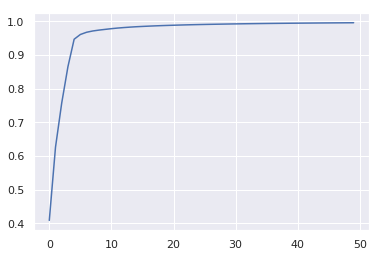

In [26]:
plt.figure()
plt.plot(np.cumsum((pca.explained_variance_ratio_)))
plt.show()

In [27]:
# Create train and test split sets for X and y variables

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3367, 50)
(3367,)
(842, 50)
(842,)


In [30]:
#Import XGBOOST
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [33]:
model = XGBRegressor(objective='reg:linear',learning_rate=0.5,max_depth=5,n_estimators=15) 
model.fit (x_train,y_train)
y_pred = model.predict(x_test)

In [35]:
RMSE_XBG = np.sqrt(mean_squared_error(y_pred, y_test))
RMSE_XBG

9.022798824343699

In [36]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(r2)

0.4342336953139143


In [37]:
print("Accuracy (RMSE): ", rmse, "R2: ",r2)

Accuracy (RMSE):  9.022798824343699 R2:  0.4342336953139143


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

d_train = xgb.DMatrix(x_train,label=y_train)
d_valid = xgb.DMatrix(x_valid,label=y_valid)
d_test = xgb.DMatrix(x_test)

params={}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train, 'train'),(d_valid, 'valid')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2_score,maximize=True,verbose_eval=10)

In [42]:
p_test = clf.predict(d_test)
pred = pd.DataFrame()
pred['y'] = p_test

In [43]:
pred.head()

,y
0,93.192108
1,104.463829
2,110.898933
3,111.624779
4,94.941803


<H2>THANK YOU><